<a href="https://colab.research.google.com/github/mohan522/kmeans/blob/main/Kmeans_unlabelled_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler,minmax_scale,MaxAbsScaler,RobustScaler
from sklearn.cluster import KMeans

In [3]:
from sklearn import datasets

In [4]:
datasets

<module 'sklearn.datasets' from '/usr/local/lib/python3.7/dist-packages/sklearn/datasets/__init__.py'>

In [5]:
df = datasets.load_breast_cancer()

In [6]:
df

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [7]:
X= df.data[:,1:3]

In [9]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [10]:
wcss = []
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(X_std)

  wcss.append(kmeans.inertia_)




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


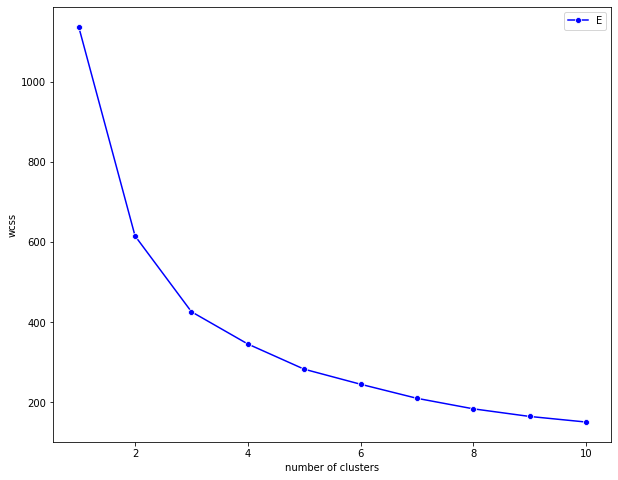

In [12]:
plt.figure(figsize = (10,8))
import seaborn as sns
sns.lineplot(range(1,11),wcss, marker = 'o', color ='blue')
plt.legend("Elbow curve")
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

from the above figure we can see that there is no significant improvement after 3 clusters so considering 3 clusters for the model

In [13]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_std)
kmeans.cluster_centers_

array([[ 0.56283823,  1.50066218],
       [-0.73568208, -0.52041333],
       [ 0.929621  , -0.29791087]])

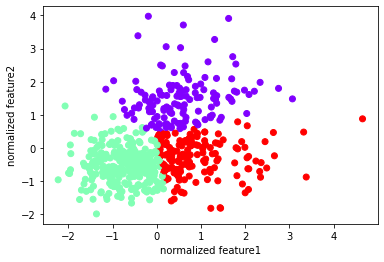

In [18]:
labels = kmeans.labels_
plt.scatter(X_std[:,0], X_std[:,1], c = labels, cmap = plt.cm.rainbow)
plt.xlabel("normalized feature1")
plt.ylabel("normalized feature2")
plt.show()